<a href="https://colab.research.google.com/github/AhnafIslamIO/summer-data-analytics-Microcredential/blob/main/HousingFinalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Teammates: Jaden Dodoo-Tawiah, Sefat Monzor,  Ahnaf Islam, Jordan Angus.  

In [ ]:
# Cited Resources 
# https://www.youtube.com/watch?v=qxpKCBV60U4
# https://www.youtube.com/watch?v=OY4eQrekQvs
# https://www.youtube.com/watch?v=xANwNonI9aw
#https://www.youtube.com/watch?v=9xcY6YDu-Ks
# https://www.youtube.com/watch?v=OS2m0f2gVJ0


# Task 1: Identify the problem:


Contributors to this section: Jordan Angus and Jaden Dodoo-Tawiah 

In this project, we are going to be analyzing different factors that impacts the pricing and value of housing within different areas such as the crime rate
Distance from that particular place to the city, accessibility to the highway, and other attributes in our data that could help us develop our machine learning models. Eventually, we will be cleaning and wraggling our data so that this way,we can improve the overall productivity and decision making for people that decide to review our data set in the future.  
 
Lists of objects that we will be implementing into our machine learning models.

#####crime_rate
#####big_lots_percent
#####office_percent
#####charles_river
#####nitrous
#####avg_num_rooms
#####pre_1940
#####distance_to_city
#####highway_access
#####tax_rate
#####student_teacher_ratio
#####median_price


### (Jordan)The purpose of this analysis follows:

Linear Regression - Find the most accurate predictor(s) of house prices

#Task 2: Load the libraries 





In [80]:
# Contributer to this section: Ahnaf Islam
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set()
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#Task 3: Load the data Contributor: Jaden Dodoo-Tawiah

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/JadenD5321/Machine-Learning-Data/main/housing_prices.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [82]:
# contributor to this section: Jaden Dodoo-Tawiah
# We check our CSV file and see which features are not nessecary to use once we have found accurate information about the datasets
df

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21600
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34700
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33400
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36200
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,22400
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,20600
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,23900
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,22000


In [83]:
# information about each columns and whether they contain null or non null values. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crime_rate             506 non-null    float64
 1   big_lots_percent       506 non-null    float64
 2   office_percent         506 non-null    float64
 3   charles_river          506 non-null    int64  
 4   nitrous                506 non-null    float64
 5   avg_num_rooms          506 non-null    float64
 6   pre_1940               506 non-null    float64
 7   distance_to_city       506 non-null    float64
 8   highway_access         506 non-null    int64  
 9   tax_rate               506 non-null    int64  
 10  student_teacher_ratio  506 non-null    float64
 11  median_price           506 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 47.6 KB


In [84]:
# describing each columns(factors that have an impact on housing prices) and their numeric value based on count, mean, standard deviation, min,and percentile ranges. 
df.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


In [85]:
# we are going to find the first five rows and also the parameters that are stored within our dataframe.

df.head()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21600
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34700
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33400
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36200


In [86]:
# we are going to see whether there are any null values stored in our set. since there is no null we are good to continue to the next step. 
# we do not have to drop any missing values are assign them to anything as all our values are intact. 

df.isnull().sum()

crime_rate               0
big_lots_percent         0
office_percent           0
charles_river            0
nitrous                  0
avg_num_rooms            0
pre_1940                 0
distance_to_city         0
highway_access           0
tax_rate                 0
student_teacher_ratio    0
median_price             0
dtype: int64

In [87]:
#checking to see columns in our dataset. 

df.columns

Index(['crime_rate', 'big_lots_percent', 'office_percent', 'charles_river',
       'nitrous', 'avg_num_rooms', 'pre_1940', 'distance_to_city',
       'highway_access', 'tax_rate', 'student_teacher_ratio', 'median_price'],
      dtype='object')

In [88]:
# We are checking to see whehter there are any missing values stored within our object. 
#Since there are no missing values, no need to drop anything in our dataset. 

for col in df.columns:
    if df[col].dtype == object:
        print(col,df[col][df[col] == '?'].count())


# Task 5: Data Visualiztion

Contributors: Sefat Monzor, Jaden Dodoo-Tawiah, and Ahnaf Islam

Here are the five visualizations types we will be using

  1) Scatterplot
  2) plt figure
  3) countplot
  4) lmplot

1. Scatter Plot (Sefat) 

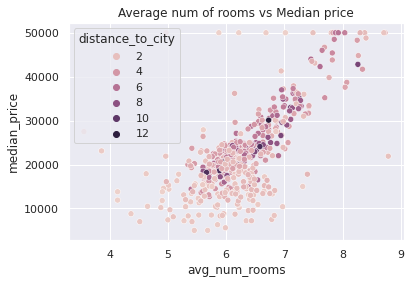

In [89]:
ax = sns.scatterplot(x='avg_num_rooms', y = 'median_price', data=df, hue = 'distance_to_city')
ax.set_title('Average num of rooms vs Median price');

##### The median price is highly related to the average number of rooms on a house. 

##### The median price is positively related to the higher number of rooms and the correlation is negatively related as the number of rooms decreases in a house. 
###### From the scatter plot, it is also observed that the median price is positively related with the distance to city. The higher the distance is, the higher the price seems to be. 

2. Countplot 

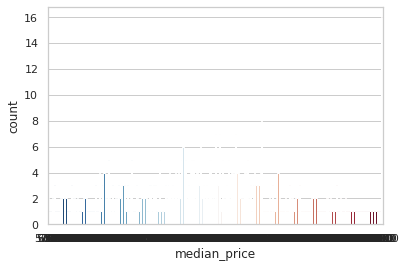

In [123]:
# contributers to this part : Ahnaf Islam and Jaden dodo-tawiah
sns.set_style('whitegrid')# here it shows the median pice of house and the number of available houses
sns.countplot(x='median_price', data=df, palette='RdBu_r')

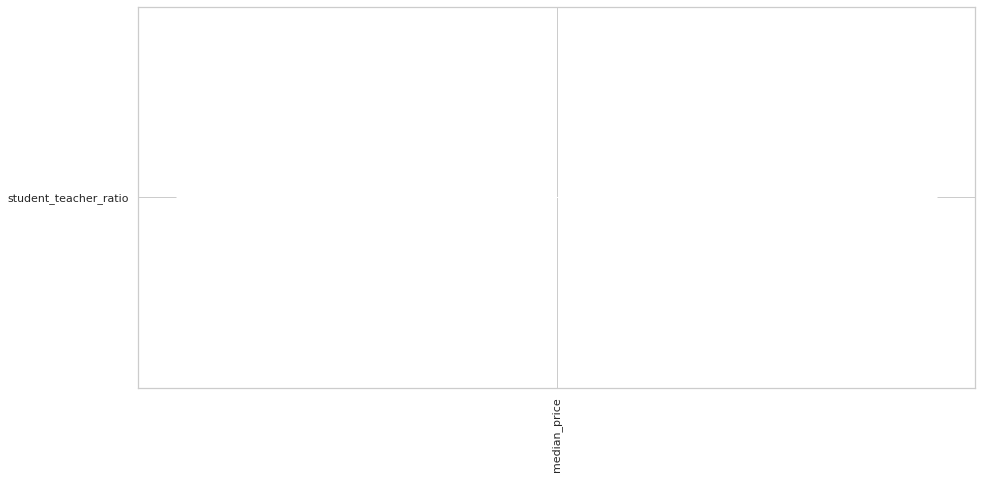

In [91]:
plt.figure(figsize=(15,7)) # the size of the graph, width - 15, height - 7
plt.bar(x='median_price', height='student_teacher_ratio', color='red') 
plt.xticks(rotation=90) #rotates the levels of x-axis to 90 degree angle 
plt.show()

####3) Implot (Sefat) 

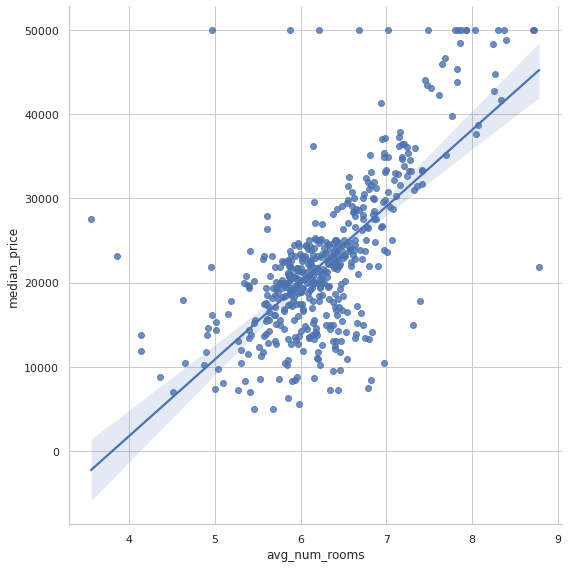

In [92]:
sns.lmplot(data=df, x = "avg_num_rooms", y = "median_price", height = 8)# different visuals for huse price 

The Implot above shares the relationship between the independent(Ave num rooms) and dependent variable(median prices). There is a positive correlation between median price and avg room numbers. The best fit line shows the tendency of increasing median prices of the houses with the increasing avg num of roooms in the house. 

# Task 6: Compute the Cost Function 

#### This analysis does not require it. 

#Task 7: Compute the Gradient Descent

#### This analysis does not require it.

#Task 8: Perform Train Test Split and Linear Regression (Jordan)

Each data split was testsed with the mean value of the corresponding column. This provides a basis to compare the expected value versus the observed value.

### First Data Split

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [94]:
df.columns

Index(['crime_rate', 'big_lots_percent', 'office_percent', 'charles_river',
       'nitrous', 'avg_num_rooms', 'pre_1940', 'distance_to_city',
       'highway_access', 'tax_rate', 'student_teacher_ratio', 'median_price'],
      dtype='object')

In [95]:
X = np.array(df[['crime_rate', 'avg_num_rooms']])
y = np.array(df['median_price'])

In [96]:
X

array([[6.3200e-03, 6.5750e+00],
       [2.7310e-02, 6.4210e+00],
       [2.7290e-02, 7.1850e+00],
       ...,
       [6.0760e-02, 6.9760e+00],
       [1.0959e-01, 6.7940e+00],
       [4.7410e-02, 6.0300e+00]])

In [97]:
y

array([24000, 21600, 34700, 33400, 36200, 28700, 22900, 27100, 16500,
       18900, 15000, 18900, 21700, 20400, 18200, 19900, 23100, 17500,
       20200, 18200, 13600, 19600, 15200, 14500, 15600, 13900, 16600,
       14800, 18400, 21000, 12700, 14500, 13200, 13100, 13500, 18900,
       20000, 21000, 24700, 30800, 34900, 26600, 25300, 24700, 21200,
       19300, 20000, 16600, 14400, 19400, 19700, 20500, 25000, 23400,
       18900, 35400, 24700, 31600, 23300, 19600, 18700, 16000, 22200,
       25000, 33000, 23500, 19400, 22000, 17400, 20900, 24200, 21700,
       22800, 23400, 24100, 21400, 20000, 20800, 21200, 20300, 28000,
       23900, 24800, 22900, 23900, 26600, 22500, 22200, 23600, 28700,
       22600, 22000, 22900, 25000, 20600, 28400, 21400, 38700, 43800,
       33200, 27500, 26500, 18600, 19300, 20100, 19500, 19500, 20400,
       19800, 19400, 21700, 22800, 18800, 18700, 18500, 18300, 21200,
       19200, 20400, 19300, 22000, 20300, 20500, 17300, 18800, 21400,
       15700, 16200,

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [99]:
regressor = LinearRegression()

In [100]:
regressor.fit(X_train,y_train)

LinearRegression()

In [101]:
df

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21600
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34700
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33400
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36200
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,22400
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,20600
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,23900
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,22000


In [102]:
df.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


In [103]:
crime_rate = 3.613524
room_num = 6.284634

In [104]:
price = regressor.predict([[crime_rate, room_num]])

Very accuarate model...

In [105]:
print("House in an area with %d crime rate and %d bedrooms cost about $%d" % (crime_rate, room_num, price))

House in an area with 3 crime rate and 6 bedrooms cost about $22465


### Second Data Split

In [106]:
X1 = np.array(df[['crime_rate', 'office_percent']])
y1 = np.array(df['median_price'])

In [107]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.1,random_state=0)

In [108]:
regressor1 = LinearRegression()

In [109]:
regressor1.fit(X1_train,y1_train)

LinearRegression()

In [110]:
df.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


In [111]:
office_percent = 11.136779

In [112]:
price1 = regressor.predict([[crime_rate, office_percent]])

In [113]:
print("House in an area with %d crime rate and %d percent office real estate cost about $%d" % (crime_rate, office_percent, price1))

House in an area with 3 crime rate and 11 percent office real estate cost about $64476


### Third Data Split

In [114]:
X2 = np.array(df[['student_teacher_ratio', 'avg_num_rooms', 'distance_to_city']])
y2 = np.array(df['median_price'])

In [115]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,random_state=0)

In [116]:
regressor2 = LinearRegression()

In [117]:
regressor2.fit(X2_train,y2_train)

LinearRegression()

In [118]:
df.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


In [119]:
student_teacher_ratio = 18.455534
distance_to_city = 3.795043

In [120]:
price2 = regressor2.predict([[student_teacher_ratio, room_num, distance_to_city]])

In [121]:
print("House in an area with %d student teacher ratio, %d bedrooms, and %d distance to a city cost about $%d" % (student_teacher_ratio, room_num, distance_to_city, price2))

House in an area with 18 student teacher ratio, 6 bedrooms, and 3 distance to a city cost about $22605


### Conclusions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



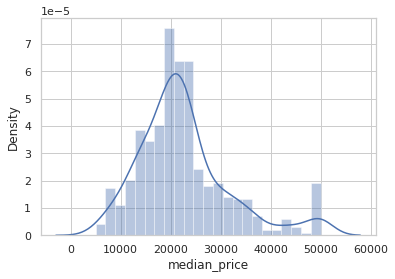

In [122]:
sns.distplot(df['median_price'])

( We all came up with one conclusion and combined it together)

In conclusion crime rate alongside the average number of rooms was the best predictors of home values. We believe that the spread of office_percent values made it difficult for the model to predict accurate home values. A possible solution for this is to use a KNN logistic regression. Overall, the first and third data split provided precise price estimates given the dataset.